In [7]:
import pandas as pd
import numpy as np

file_upload = pd.read_csv('Most Streamed Spotify Songs 2024 2.csv', encoding='latin1')

file_upload['Release Date']=pd.to_datetime(file_upload['Release Date'], format = "%m/%d/%Y")


In [8]:
file_upload.dtypes

Track                                 object
Album Name                            object
Artist                                object
Release Date                  datetime64[ns]
ISRC                                  object
All Time Rank                         object
Track Score                          float64
Spotify Streams                       object
Spotify Playlist Count                object
Spotify Playlist Reach                object
Spotify Popularity                   float64
YouTube Views                         object
YouTube Likes                         object
TikTok Posts                          object
TikTok Likes                          object
TikTok Views                          object
YouTube Playlist Reach                object
Apple Music Playlist Count           float64
AirPlay Spins                         object
SiriusXM Spins                        object
Deezer Playlist Count                float64
Deezer Playlist Reach                 object
Amazon Pla

In [9]:
file_upload['Spotify Streams']= file_upload['Spotify Streams'].replace(',','', regex=True)

In [10]:
file_upload['Spotify Streams'] = pd.to_numeric(file_upload['Spotify Streams'], downcast = 'integer', errors='coerce').fillna(0)

In [11]:
strings_to_nums = file_upload[['All Time Rank','Spotify Playlist Count','Spotify Playlist Reach','YouTube Views','YouTube Likes'
                               ,'TikTok Posts','TikTok Likes','TikTok Views','YouTube Playlist Reach','AirPlay Spins','SiriusXM Spins'
                               ,'Deezer Playlist Reach','Pandora Streams','Pandora Track Stations','Soundcloud Streams','Shazam Counts']]

In [12]:
strings_to_nums = strings_to_nums.replace(',','', regex=True)

In [13]:
strings_to_nums = strings_to_nums.apply(pd.to_numeric, args =('coerce','integer')).fillna('0')
strings_to_nums.dtypes

All Time Rank              int16
Spotify Playlist Count    object
Spotify Playlist Reach    object
YouTube Views             object
YouTube Likes             object
TikTok Posts              object
TikTok Likes              object
TikTok Views              object
YouTube Playlist Reach    object
AirPlay Spins             object
SiriusXM Spins            object
Deezer Playlist Reach     object
Pandora Streams           object
Pandora Track Stations    object
Soundcloud Streams        object
Shazam Counts             object
dtype: object

In [14]:
file_upload[['All Time Rank','Spotify Playlist Count','Spotify Playlist Reach','YouTube Views','YouTube Likes','TikTok Posts','TikTok Likes'
             ,'TikTok Views','YouTube Playlist Reach','AirPlay Spins','SiriusXM Spins','Deezer Playlist Reach','Pandora Streams','Pandora Track Stations'
             ,'Soundcloud Streams','Shazam Counts']] = strings_to_nums

In [15]:
file_upload['Explicit Track']= file_upload['Explicit Track'].astype(bool)

In [16]:
most_popular = file_upload['Artist'].mode()
print(most_popular)

0           Drake
1    Taylor Swift
Name: Artist, dtype: object


In [17]:
result = file_upload[file_upload['Artist'] == 'Drake']
print(result[['Track','Artist','All Time Rank']])

                                        Track Artist  All Time Rank
153                            Family Matters  Drake            154
175   Rich Baby Daddy (feat. Sexyy Red & SZA)  Drake            176
186                        IDGAF (feat. Yeat)  Drake            187
191             Jimmy Cooks (feat. 21 Savage)  Drake            192
201      First Person Shooter (feat. J. Cole)  Drake            202
...                                       ...    ...            ...
4099                                 Too Good  Drake           4074
4208       All The Parties (feat. Chief Keef)  Drake           4177
4227                         Hours In Silence  Drake           4218
4276               No Friends In The Industry  Drake           4267
4388                          Fear Of Heights  Drake           4358

[63 rows x 3 columns]


In [18]:
result = file_upload[file_upload['Artist'] == 'Taylor Swift']
print(result[['Track','Artist','All Time Rank']])

                                                  Track        Artist  \
16                        Fortnight (feat. Post Malone)  Taylor Swift   
90                                            Anti-Hero  Taylor Swift   
239   Is It Over Now? (Taylor's Version) (From The V...  Taylor Swift   
266                     I Can Do It With a Broken Heart  Taylor Swift   
452                                        Cruel Summer  Taylor Swift   
...                                                 ...           ...   
3909                                      The Black Dog  Taylor Swift   
4034                                    thanK you aIMee  Taylor Swift   
4148                                    How Did It End?  Taylor Swift   
4487            You Belong With Me (Taylorï¿½ï¿½ï¿½s Ve  Taylor Swift   
4492   Say Don't Go (Taylor's Version) (From The Vault)  Taylor Swift   

      All Time Rank  
16               17  
90               91  
239             240  
266             267  
452          

In [19]:
result = file_upload[file_upload['Artist'] == 'Drake']
print(result['All Time Rank'])

153      154
175      176
186      187
191      192
201      202
        ... 
4099    4074
4208    4177
4227    4218
4276    4267
4388    4358
Name: All Time Rank, Length: 63, dtype: int16


In [20]:
print(result['All Time Rank'].mean())

1956.095238095238


In [21]:
result = file_upload[file_upload['Artist'] == 'Taylor Swift']
result['All Time Rank'].mean()

2340.5079365079364

In [22]:
print(file_upload['Artist'])

0        Tommy Richman
1       Kendrick Lamar
2              Artemas
3          Miley Cyrus
4               Eminem
             ...      
4595       $uicideboy$
4596        Atif Aslam
4597          Lil Baby
4598      Arijit Singh
4599         Arcï¿½ï¿½
Name: Artist, Length: 4600, dtype: object


<Axes: >

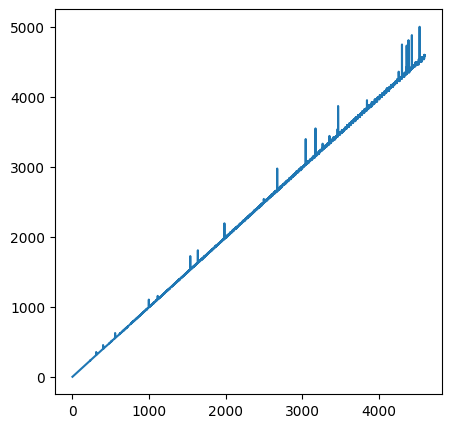

In [23]:
d = file_upload['All Time Rank']
d.plot(figsize = (5,5))

In [24]:
file_upload.describe()

,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity
count,4600,4600.000000,4600.000000,4.600000e+03,3796.000000,4039.00000,3679.000000,3545.000000,0.0
mean,2021-01-27 07:48:18.782608896,2290.678043,41.844043,4.363971e+08,63.501581,54.60312,32.310954,25.348942,NaN
min,1987-07-21 00:00:00,1.000000,19.400000,0.000000e+00,1.000000,1.00000,1.000000,1.000000,NaN
25%,2019-07-16 18:00:00,1144.750000,23.300000,6.340627e+07,61.000000,10.00000,5.000000,8.000000,NaN
50%,2022-06-01 00:00:00,2290.500000,29.900000,2.263761e+08,67.000000,28.00000,15.000000,17.000000,NaN
75%,2023-08-11 00:00:00,3436.250000,44.425000,6.113563e+08,73.000000,70.00000,37.000000,34.000000,NaN
max,2024-06-14 00:00:00,4998.000000,725.400000,4.281469e+09,96.000000,859.00000,632.000000,210.000000,NaN
std,NaN,1322.878312,38.543766,5.362792e+08,16.186438,71.61227,54.274538,25.989826,NaN


In [25]:
kendrick = file_upload[file_upload['Artist'] == 'Kendrick Lamar']

In [26]:
kendrick.describe()

,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity
count,18,18.000000,18.000000,1.800000e+01,17.000000,18.000000,18.000000,18.000000,0.0
mean,2019-08-04 14:40:00,2155.611111,73.827778,6.784117e+08,74.411765,93.722222,31.277778,34.388889,NaN
min,2012-01-01 00:00:00,2.000000,19.700000,6.552039e+07,59.000000,5.000000,3.000000,6.000000,NaN
25%,2017-04-14 00:00:00,1221.500000,25.250000,2.123722e+08,71.000000,23.250000,7.250000,22.000000,NaN
50%,2022-05-10 12:00:00,2175.500000,30.750000,3.753202e+08,74.000000,63.500000,24.000000,25.500000,NaN
75%,2022-05-13 00:00:00,3020.000000,42.850000,1.050746e+09,79.000000,150.500000,44.500000,37.000000,NaN
max,2024-05-04 00:00:00,4470.000000,545.900000,2.226870e+09,92.000000,357.000000,111.000000,111.000000,NaN
std,NaN,1415.624541,125.923169,6.327132e+08,7.984820,91.825157,29.381478,27.685500,NaN


In [27]:
file_upload.head(5)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,NaN,False
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,NaN,True
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,NaN,False
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,0,11822942.0,NaN,False
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,NaN,True


In [28]:
topfive = file_upload.head(5)

In [29]:
topfive.describe()

,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity
count,5,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.0000,5.000000,0.0
mean,2024-01-24 00:00:00,3.000000,535.580000,6.907599e+08,89.800000,232.800000,122.2000,142.400000,NaN
min,2023-01-12 00:00:00,1.000000,423.300000,1.070349e+08,85.000000,182.000000,62.0000,105.000000,NaN
25%,2024-03-19 00:00:00,2.000000,444.900000,3.237039e+08,88.000000,188.000000,67.0000,111.000000,NaN
50%,2024-04-26 00:00:00,3.000000,538.400000,3.904709e+08,92.000000,190.000000,82.0000,114.000000,NaN
75%,2024-05-04 00:00:00,4.000000,545.900000,6.013093e+08,92.000000,210.000000,136.0000,172.000000,NaN
max,2024-05-31 00:00:00,5.000000,725.400000,2.031281e+09,92.000000,394.000000,264.0000,210.000000,NaN
std,NaN,1.581139,119.347966,7.698434e+08,3.193744,90.725961,84.5352,46.468269,NaN


In [30]:
file_upload.head(5).describe()

,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity
count,5,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.0000,5.000000,0.0
mean,2024-01-24 00:00:00,3.000000,535.580000,6.907599e+08,89.800000,232.800000,122.2000,142.400000,NaN
min,2023-01-12 00:00:00,1.000000,423.300000,1.070349e+08,85.000000,182.000000,62.0000,105.000000,NaN
25%,2024-03-19 00:00:00,2.000000,444.900000,3.237039e+08,88.000000,188.000000,67.0000,111.000000,NaN
50%,2024-04-26 00:00:00,3.000000,538.400000,3.904709e+08,92.000000,190.000000,82.0000,114.000000,NaN
75%,2024-05-04 00:00:00,4.000000,545.900000,6.013093e+08,92.000000,210.000000,136.0000,172.000000,NaN
max,2024-05-31 00:00:00,5.000000,725.400000,2.031281e+09,92.000000,394.000000,264.0000,210.000000,NaN
std,NaN,1.581139,119.347966,7.698434e+08,3.193744,90.725961,84.5352,46.468269,NaN


In [31]:
import matplotlib.pyplot as plt

In [32]:
data_subset = file_upload.Artist.value_counts().head(10)
print(data_subset)

Artist
Drake            63
Taylor Swift     63
Bad Bunny        60
KAROL G          32
The Weeknd       31
Travis Scott     30
Billie Eilish    27
Ariana Grande    26
Future           23
Peso Pluma       22
Name: count, dtype: int64


In [33]:
drake = file_upload['Artist']

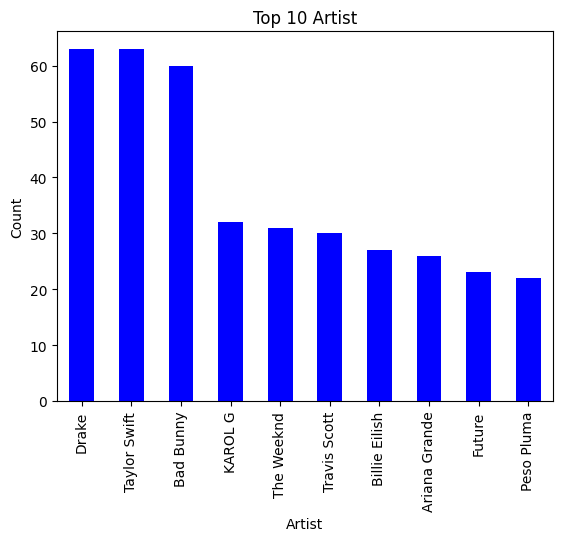

In [34]:
data_subset.plot(kind = 'bar', color = 'blue')
plt.title('Top 10 Artist')
plt.ylabel('Count')
plt.show()

In [35]:
explicit_counts = file_upload['Explicit Track'].value_counts()
print(explicit_counts)

Explicit Track
False    2949
True     1651
Name: count, dtype: int64


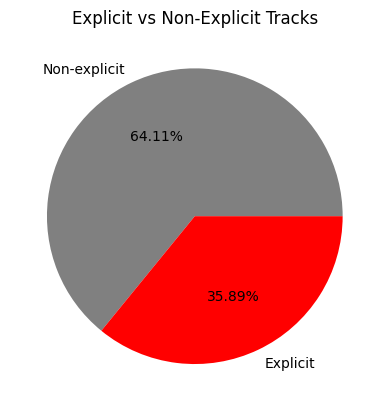

In [36]:
plt.pie(explicit_counts, labels = ['Non-explicit', 'Explicit'], autopct = '%1.2f%%', colors = ['grey', 'red'])
plt.title('Explicit vs Non-Explicit Tracks')
plt.show()

In [37]:
import seaborn as sns

In [38]:
file_upload['Year'] = file_upload['Release Date'].dt.year
print(file_upload['Year'].head())

0    2024
1    2024
2    2024
3    2023
4    2024
Name: Year, dtype: int32


<Axes: xlabel='Year', ylabel='Count'>

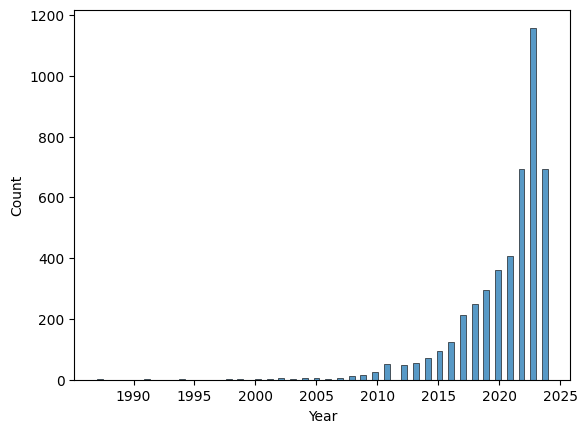

In [39]:
sns.histplot(data=file_upload, x="Year")

<Axes: xlabel='Year', ylabel='Count'>

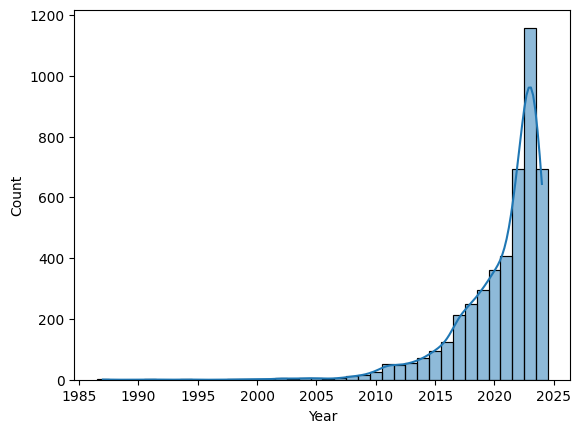

In [40]:
sns.histplot(data=file_upload, x="Year", kde=True, discrete=True)

In [41]:
file_upload['Month'] = file_upload['Release Date'].dt.month

<Axes: xlabel='Month', ylabel='Count'>

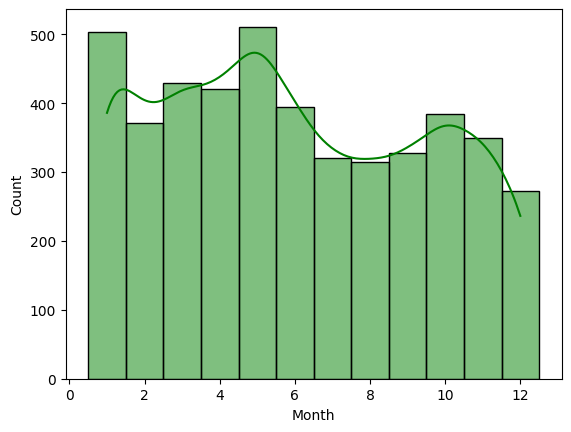

In [42]:
sns.histplot(data=file_upload, x="Month", kde=True, discrete=True, color = 'green')

In [43]:
print(file_upload['Month'].value_counts())

Month
5     511
1     503
3     430
4     420
6     395
10    384
2     371
11    350
9     328
7     321
8     315
12    272
Name: count, dtype: int64


In [44]:
print(file_upload['Month'].mode())

0    5
Name: Month, dtype: int32


<Axes: xlabel='Track Score'>

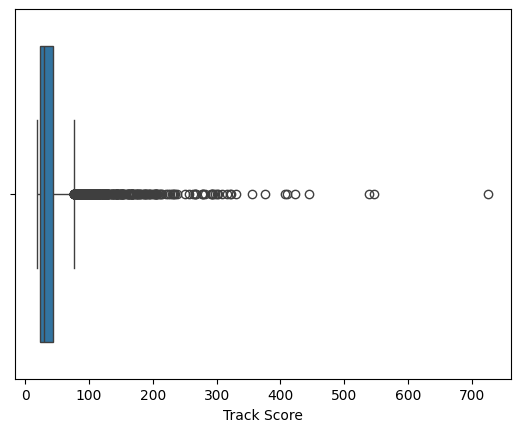

In [45]:
sns.boxplot(data=file_upload, x="Track Score")

In [46]:
numeric_df = file_upload.select_dtypes(include = ['float64', 'int32'])
corr_matrix = numeric_df.corr()
print(corr_matrix)

                            Track Score  Spotify Streams  Spotify Popularity  \
Track Score                    1.000000         0.244176            0.192808   
Spotify Streams                0.244176         1.000000            0.363172   
Spotify Popularity             0.192808         0.363172            1.000000   
Apple Music Playlist Count     0.402765         0.744640            0.288430   
Deezer Playlist Count          0.337561         0.645145            0.238246   
Amazon Playlist Count          0.548705         0.455462            0.320260   
TIDAL Popularity                    NaN              NaN                 NaN   
Year                           0.126693        -0.556165           -0.142739   
Month                         -0.031149        -0.049758           -0.027578   

                            Apple Music Playlist Count  Deezer Playlist Count  \
Track Score                                   0.402765               0.337561   
Spotify Streams                      

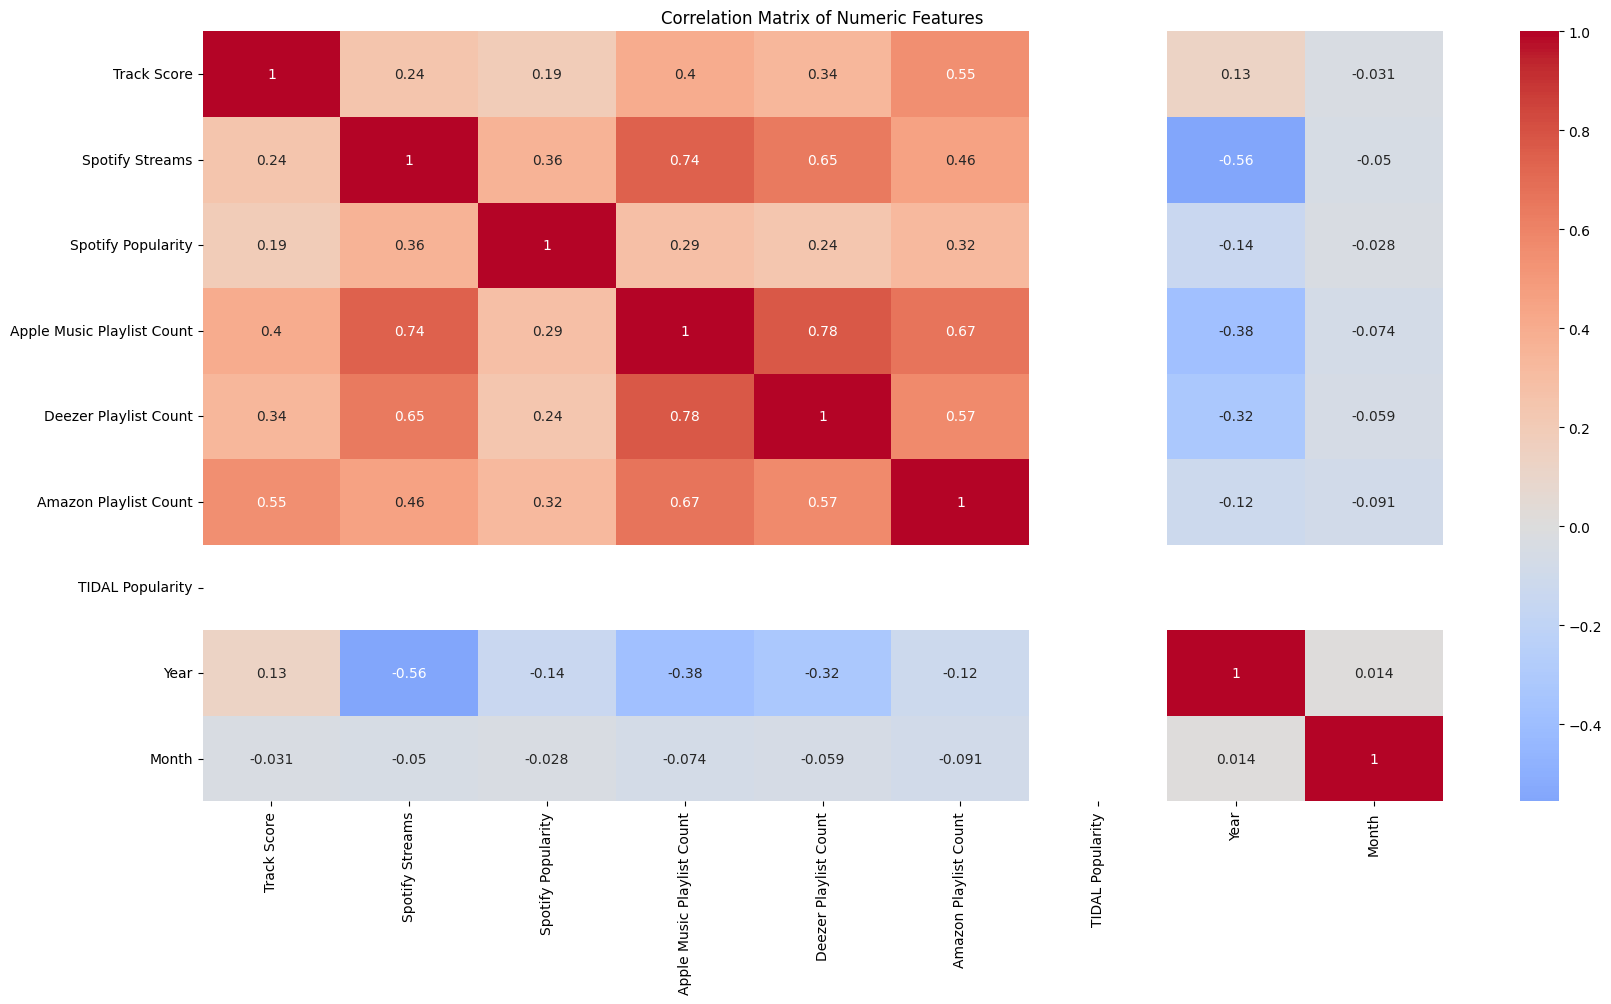

In [47]:
plt.figure(figsize = (20, 10))
sns.color_palette("coolwarm", as_cmap=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [48]:
tfifty = file_upload.head(50)

In [49]:
pivot = pd.pivot_table(data = tfifty, index = 'Track', columns='Year', values='Track Score', aggfunc='sum')
print(pivot)

Year                                                 2015   2017   2019  \
Track                                                                     
A Bar Song (Tipsy)                                    NaN    NaN    NaN   
As It Was                                             NaN    NaN    NaN   
BAND4BAND (feat. Lil Baby)                            NaN    NaN    NaN   
BIRDS OF A FEATHER                                    NaN    NaN    NaN   
BLUE                                                  NaN    NaN    NaN   
Baby Shark                                          265.7    NaN    NaN   
Beat Automotivo Tan Tan Tan Viral                     NaN    NaN    NaN   
Beautiful Things                                      NaN    NaN    NaN   
Cupid ï¿½ï¿½ï¿½ Twin Ver. (FIFTY FIFTY) ï¿½ï¿½ï...    NaN    NaN    NaN   
Dance Monkey                                          NaN    NaN  214.5   
Danza Kuduro - Cover                                  NaN    NaN    NaN   
Daylight                 

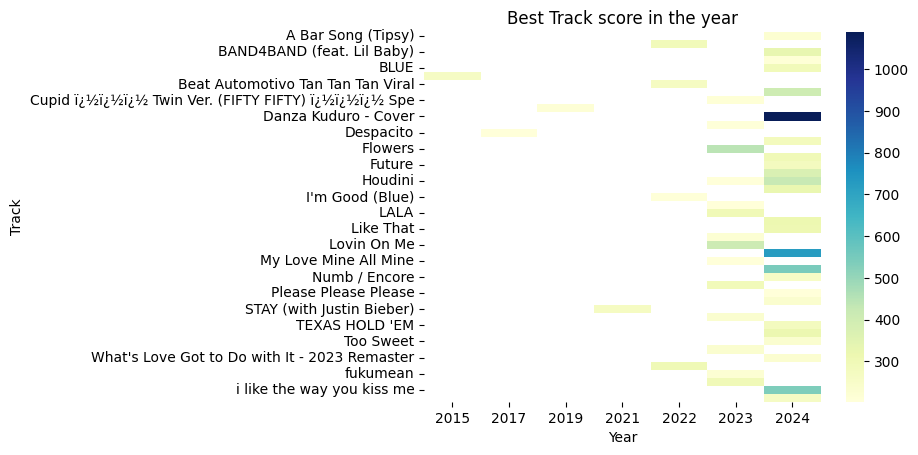

In [50]:
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Best Track score in the year')
plt.show()

In [51]:
file_upload.dtypes

Track                                 object
Album Name                            object
Artist                                object
Release Date                  datetime64[ns]
ISRC                                  object
All Time Rank                          int16
Track Score                          float64
Spotify Streams                      float64
Spotify Playlist Count                object
Spotify Playlist Reach                object
Spotify Popularity                   float64
YouTube Views                         object
YouTube Likes                         object
TikTok Posts                          object
TikTok Likes                          object
TikTok Views                          object
YouTube Playlist Reach                object
Apple Music Playlist Count           float64
AirPlay Spins                         object
SiriusXM Spins                        object
Deezer Playlist Count                float64
Deezer Playlist Reach                 object
Amazon Pla

In [52]:
file_upload.head(50)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Year,Month
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,NaN,False,2024,4
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,NaN,True,2024,5
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,NaN,False,2024,3
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,24684248.0,210.0,190260277.0,203384.0,0,11822942.0,NaN,False,2023,1
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,NaN,True,2024,5
5,Lovin On Me,Lovin On Me,Jack Harlow,2023-11-10,USAT22311371,6,410.1,6.706654e+08,105892.0,175421034.0,...,17167254.0,152.0,138529362.0,50982.0,9438601.0,4517131.0,NaN,True,2023,11
6,Beautiful Things,Beautiful Things,Benson Boone,2024-01-18,USWB12307016,7,407.2,9.001588e+08,73118.0,201585714.0,...,48197850.0,154.0,65447476.0,57372.0,0,9990302.0,NaN,False,2024,1
7,Gata Only,Gata Only,FloyyMenor,2024-02-02,QZL382406049,8,375.8,6.750792e+08,40094.0,211236940.0,...,33245595.0,53.0,3372428.0,5762.0,0,6063523.0,NaN,True,2024,2
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,2024-06-09,TCJPA2463708,9,355.7,1.653018e+09,1.0,15.0,...,0,NaN,0,0,0,0,NaN,True,2024,6
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,2024-05-23,USSM12404354,10,330.6,9.067657e+07,10400.0,184199419.0,...,10800098.0,92.0,1005626.0,842.0,3679709.0,666302.0,NaN,True,2024,5


In [53]:
file_upload.dtypes

Track                                 object
Album Name                            object
Artist                                object
Release Date                  datetime64[ns]
ISRC                                  object
All Time Rank                          int16
Track Score                          float64
Spotify Streams                      float64
Spotify Playlist Count                object
Spotify Playlist Reach                object
Spotify Popularity                   float64
YouTube Views                         object
YouTube Likes                         object
TikTok Posts                          object
TikTok Likes                          object
TikTok Views                          object
YouTube Playlist Reach                object
Apple Music Playlist Count           float64
AirPlay Spins                         object
SiriusXM Spins                        object
Deezer Playlist Count                float64
Deezer Playlist Reach                 object
Amazon Pla

In [54]:
platforms = ['Shazam Counts', 'Soundcloud Streams', 'Pandora Streams', 'YouTube Views', 'TikTok Views', 'Spotify Streams']

In [55]:
file_upload[['Shazam Counts', 'Soundcloud Streams', 'Pandora Streams', 'YouTube Views', 'TikTok Views', 'Spotify Streams']].dtypes

Shazam Counts          object
Soundcloud Streams     object
Pandora Streams        object
YouTube Views          object
TikTok Views           object
Spotify Streams       float64
dtype: object

In [56]:
filters = file_upload[['Shazam Counts', 'Soundcloud Streams', 'Pandora Streams', 'YouTube Views', 'TikTok Views', 'Spotify Streams']]

In [57]:
filters = filters.replace(',','', regex=True)

In [58]:
file_upload[['Shazam Counts', 'Soundcloud Streams', 'Pandora Streams', 'YouTube Views', 'TikTok Views', 'Spotify Streams']].dtypes

Shazam Counts          object
Soundcloud Streams     object
Pandora Streams        object
YouTube Views          object
TikTok Views           object
Spotify Streams       float64
dtype: object

In [59]:
file_upload1 = file_upload[['Track', 'Shazam Counts', 'Soundcloud Streams', 'Pandora Streams', 'YouTube Views', 'TikTok Views', 'Spotify Streams']]

In [60]:
file_upload1.head(5)

,Track,Shazam Counts,Soundcloud Streams,Pandora Streams,YouTube Views,TikTok Views,Spotify Streams
0,MILLION DOLLAR BABY,2669262.0,4818457.0,18004655.0,84274754.0,5332281936.0,3.904709e+08
1,Not Like Us,1118279.0,6623075.0,7780028.0,116347040.0,208339025.0,3.237039e+08
2,i like the way you kiss me,5285340.0,7208651.0,5022621.0,122599116.0,3369120610.0,6.013093e+08
3,Flowers,11822942.0,0,190260277.0,1096100899.0,14603725994.0,2.031281e+09
4,Houdini,457017.0,207179.0,4493884.0,77373957.0,0,1.070349e+08


In [61]:
plt.bar(file_upload, data = file_upload1)

TypeError: bar() missing 1 required positional argument: 'height'

In [68]:
df = pd.DataFrame(file_upload1)

In [70]:
df.dtypes

Track                  object
Shazam Counts          object
Soundcloud Streams     object
Pandora Streams        object
YouTube Views          object
TikTok Views           object
Spotify Streams       float64
dtype: object

In [71]:
df['Track'] = df['Track'].str.lower()

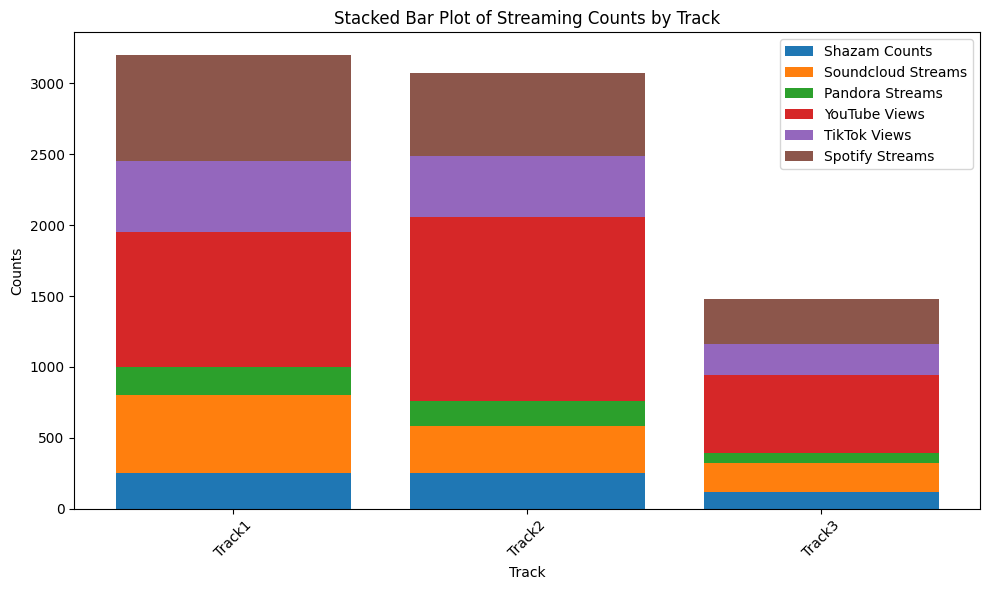

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual dataset)
data = {
    'Track': ['Track1', 'Track1', 'Track2', 'Track2', 'Track3'],
    'Shazam Counts': [100, 150, 200, 50, 120],
    'Soundcloud Streams': [300, 250, 150, 180, 200],
    'Pandora Streams': [80, 120, 100, 80, 70],
    'YouTube Views': [500, 450, 600, 700, 550],
    'TikTok Views': [200, 300, 180, 250, 220],
    'Spotify Streams': [400, 350, 300, 280, 320]
}

df = pd.DataFrame(data)

# Group by 'Track' and sum the counts for each platform
grouped = df.groupby('Track').sum()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as necessary

# Create a stacked bar plot
platforms = df.columns[1:]  # Exclude 'Track' column
bottom = None

for platform in platforms:
    plt.bar(grouped.index, grouped[platform], label=platform, bottom=bottom)
    if bottom is None:
        bottom = grouped[platform]
    else:
        bottom += grouped[platform]

plt.xlabel('Track')
plt.ylabel('Counts')
plt.title('Stacked Bar Plot of Streaming Counts by Track')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [77]:
columnchange = file_upload[['Shazam Counts', 'Soundcloud Streams', 'Pandora Streams', 'YouTube Views', 'TikTok Views', 'Spotify Streams']]

In [79]:
columnchange = columnchange.replace(',','', regex=True)

In [81]:
strings_to_nums = file_upload[['All Time Rank','Spotify Playlist Count','Spotify Playlist Reach','YouTube Views','YouTube Likes'
                               ,'TikTok Posts','TikTok Likes','TikTok Views','YouTube Playlist Reach','AirPlay Spins','SiriusXM Spins'
                               ,'Deezer Playlist Reach','Pandora Streams','Pandora Track Stations','Soundcloud Streams','Shazam Counts']]

In [82]:
strings_to_nums = strings_to_nums.replace(',','', regex=True)

In [83]:
strings_to_nums = strings_to_nums.apply(pd.to_numeric, args =('coerce','integer')).fillna('0')


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:378: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


In [84]:
file_upload[['All Time Rank','Spotify Playlist Count','Spotify Playlist Reach','YouTube Views','YouTube Likes','TikTok Posts','TikTok Likes'
             ,'TikTok Views','YouTube Playlist Reach','AirPlay Spins','SiriusXM Spins','Deezer Playlist Reach','Pandora Streams','Pandora Track Stations'
             ,'Soundcloud Streams','Shazam Counts']] = strings_to_nums

In [85]:
file_upload.dtypes

Track                                 object
Album Name                            object
Artist                                object
Release Date                  datetime64[ns]
ISRC                                  object
All Time Rank                          int16
Track Score                          float64
Spotify Streams                      float64
Spotify Playlist Count                 int32
Spotify Playlist Reach                 int32
Spotify Popularity                   float64
YouTube Views                          int64
YouTube Likes                          int32
TikTok Posts                           int32
TikTok Likes                           int64
TikTok Views                           int64
YouTube Playlist Reach                 int64
Apple Music Playlist Count           float64
AirPlay Spins                          int32
SiriusXM Spins                         int16
Deezer Playlist Count                float64
Deezer Playlist Reach                  int32
Amazon Pla

In [86]:
file_upload1 = file_upload[['Track', 'Shazam Counts', 'Soundcloud Streams', 'Pandora Streams', 'YouTube Views', 'TikTok Views', 'Spotify Streams']]

In [87]:
df = pd.DataFrame(file_upload1)

In [88]:
df.dtypes

Track                  object
Shazam Counts           int32
Soundcloud Streams      int32
Pandora Streams         int32
YouTube Views           int64
TikTok Views            int64
Spotify Streams       float64
dtype: object

In [89]:
df['Track'] = df['Track'].astype(str)

In [90]:
df.dtypes

Track                  object
Shazam Counts           int32
Soundcloud Streams      int32
Pandora Streams         int32
YouTube Views           int64
TikTok Views            int64
Spotify Streams       float64
dtype: object

In [91]:
df['Track'] = df['Track'].str.lower()

In [92]:
grouped = df.groupby('Track').sum()

In [121]:
plt.figure(figsize=(100,60))

<Figure size 10000x6000 with 0 Axes>

<Figure size 10000x6000 with 0 Axes>

In [94]:
platforms = df.columns[1:]

In [95]:
bottom = None

In [114]:
file_upload2 = file_upload1.head(10)

In [115]:
df1 = pd.DataFrame(file_upload2)

In [136]:
grouped = df1.groupby('Track').sum()


plt.figure(figsize=(100, 60))

platforms = df1.columns[1:]  
bottom = None

for platform in platforms:
    plt.bar(grouped.index, grouped[platform], label=platform, bottom=bottom)
    if bottom is None:
        bottom = grouped[platform]
    else:
        bottom += grouped[platform]

plt.xlabel('Track')
plt.ylabel('Counts')
plt.title('Stacked Bar Plot of Streaming Counts by Track')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.rcParams['font.size'] = 120

plt.show()